In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from data_preprocess import *
from textblob import TextBlob
from joblib import dump, load
from model import *
%load_ext autoreload
%autoreload 2

# data loading and pre-processing

In [2]:
df = pd.read_csv('dataset/Combined_News_DJIA.csv')

In [3]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,8/13/2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,8/14/2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to mis

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
for column in df.columns[2:]:
    df[column] = df[column].str.lstrip('b')

In [6]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as coun...",'BREAKING: Musharraf to be impeached.','Russia Today: Columns of troops roll into Sou...,'Russian tanks are moving towards the capital ...,"""Afghan children raped with 'impunity,' U.N. o...",'150 Russian tanks have entered South Ossetia ...,"""Breaking: Georgia invades South Ossetia, Russ...","""The 'enemy combatent' trials are nothing but ...",...,'Georgia Invades South Ossetia - if Russia get...,'Al-Qaeda Faces Islamist Backlash',"'Condoleezza Rice: ""The US would not act to pr...",'This is a busy day: The European Union has a...,"""Georgia will withdraw 1,000 soldiers from Ira...",'Why the Pentagon Thinks Attacking Iran is a B...,'Caucasus in crisis: Georgia invades South Oss...,'Indian shoe manufactory - And again in a ser...,'Visitors Suffering from Mental Illnesses Bann...,"""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,'Why wont America and Nato help us? If they wo...,'Bush puts foot down on Georgian conflict',"""Jewish Georgian minister: Thanks to Israeli t...",'Georgian army flees in disarray as Russians a...,"""Olympic opening ceremony fireworks 'faked'""",'What were the Mossad with fraudulent New Zeal...,'Russia angered by Israeli military sale to Ge...,'An American citizen living in S.Ossetia blame...,...,'Israel and the US behind the Georgian aggress...,"'""Do not believe TV, neither Russian nor Georg...",'Riots are still going on in Montreal (Canada)...,'China to overtake US as largest manufacturer','War in South Ossetia [PICS]','Israeli Physicians Group Condemns State Torture',' Russia has just beaten the United States ove...,'Perhaps *the* question about the Georgia - Ru...,'Russia is so much better at war',"""So this is what it's come to: trading sex for..."
2,2008-08-12,0,'Remember that adorable 9-year-old who sang at...,"""Russia 'ends Georgia operation'""","'""If we had no sexual harassment we would have...","""Al-Qa'eda is losing support in Iraq because o...",'Ceasefire in Georgia: Putin Outmaneuvers the ...,'Why Microsoft and Intel tried to kill the XO ...,'Stratfor: The Russo-Georgian War and the Bala...,"""I'm Trying to Get a Sense of This Whole Georg...",...,'U.S. troops still in Georgia (did you know th...,'Why Russias response to Georgia was right',"'Gorbachev accuses U.S. of making a ""serious b...","'Russia, Georgia, and NATO: Cold War Two'",'Remember that adorable 62-year-old who led yo...,'War in Georgia: The Israeli connection','All signs point to the US encouraging Georgia...,'Christopher King argues that the US and NATO ...,'America: The New Mexico?',"""BBC NEWS | Asia-Pacific | Extinction 'by man ..."
3,2008-08-13,0,' U.S. refuses Israel weapons to attack Iran: ...,"""When the president ordered to attack Tskhinva...",' Israel clears troops who killed Reuters came...,'Britain\'s policy of being tough on drugs is ...,'Body of 14 year old found in trunk; Latest (r...,'China has moved 10 *million* quake survivors ...,"""Bush announces Operation Get All Up In Russia...",'Russian forces sink Georgian ships ',...,'Elephants extinct by 2020?','US humanitarian missions soon in Georgia - if...,"""Georgia's DDOS came from US sources""","'Russian convoy heads into Georgia, violating ...",'Israeli defence minister: US against strike o...,'Gorbachev: We Had No Choice','Witness: Russian forces head towards Tbilisi ...,' Quarter of Russians blame U.S. for conflict:...,'Georgian president says US military will tak...,'2006: Nobel laureate Aleksander Solzhenitsyn ...
4,2008-08-14,1,'All the experts admit that we should legalise...,'War in South Osetia - 89 pictures made by a R...,'Swedish wrestler Ara Abrahamian throws away m...,'Russia exaggerated the death toll in South Os...,'Missile That Killed 9 Inside Pakistan May Hav...,"""Rushdie Condemns Random House's Refusal to Pu...",'Poland and US agree to missle defense 

In [7]:
df['summary'] = df[df.columns[2:]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

In [8]:
df_data = df[["Date", "Label", 'summary']]

In [9]:
df_data = data_preprocess(df_data, 'summary', remove_stopwords=True, sentiment=True, stem_lemma=False)

/Users/i354001/Desktop/Echo/text analysis/data_preprocess.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[CLEAN_COL] = clean_col(df[column])
/Users/i354001/opt/anaconda3/envs/btc_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/i354001/Desktop/Echo/text analysis/data_preprocess.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [10]:
df_data.head()

,Date,Label,summary,clean_data,polarity,subjectivity
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as coun...",georgia downs two russian warplanes countries ...,-0.048568,0.267549
1,2008-08-11,1,'Why wont America and Nato help us? If they wo...,wont america nato help us wont help us help ir...,0.121956,0.374806
2,2008-08-12,0,'Remember that adorable 9-year-old who sang at...,remember adorable yearold sang opening ceremon...,-0.046530,0.518785
3,2008-08-13,0,' U.S. refuses Israel weapons to attack Iran: ...,u refuses israel weapons attack iran report pr...,0.011398,0.364021
4,2008-08-14,1,'All the experts admit that we should legalise...,experts admit legalise drugs war south osetia ...,0.040677,0.375099


# training and testing data split (based on date)

In [11]:
train_df = df_data[df_data.Date < '2015-01-01']
test_df = df_data[df_data.Date >= '2015-01-01']

In [12]:
train_df.Date

0      2008-08-08
1      2008-08-11
2      2008-08-12
3      2008-08-13
4      2008-08-14
          ...    
1606   2014-12-24
1607   2014-12-26
1608   2014-12-29
1609   2014-12-30
1610   2014-12-31
Name: Date, Length: 1611, dtype: datetime64[ns]

In [13]:
print("train data shape: ", train_df.shape)
print("test data shape: ", test_df.shape)

train data shape:  (1611, 6)
test data shape:  (378, 6)


In [14]:
print('train data distribution:\n', train_df.Label.value_counts())
print('test data distribution:\n', test_df.Label.value_counts())

train data distribution:
 1    873
0    738
Name: Label, dtype: int64
test data distribution:
 1    192
0    186
Name: Label, dtype: int64


# Data Vectorization (text -> vect)

In [15]:
train_data, transform = data_vect_fit(train_df, CLEAN_COL, sentiment=False,topic_vect=False)
test_data = data_vect_transform(test_df, CLEAN_COL, transform )

In [16]:
train_label = train_df['Label']
test_label = test_df['Label']

In [17]:
print("training data shape: ", train_data.shape)
print("testing data shape: ", test_data.shape)

training data shape:  (1611, 1000)
testing data shape:  (378, 1000)


# model training

In [32]:
clf = RandomForestClassifier()

In [33]:
print('random forest results: ')
clf = model_fit_predict(clf, train_data, train_label, test_data, test_label)

random forest results: 
training accuracy:  0.9863438857852266
testing accuracy:  0.5079365079365079
testing auc score:  0.53125
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       186
           1       0.52      0.50      0.51       192

   micro avg       0.51      0.51      0.51       378
   macro avg       0.51      0.51      0.51       378
weighted avg       0.51      0.51      0.51       378



/Users/i354001/opt/anaconda3/envs/btc_analysis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
test_df['predict_label'] = clf.predict(test_data)

/Users/i354001/opt/anaconda3/envs/btc_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
test_df.to_csv('test.csv', index=False)

# Save model

In [83]:
from model import save_transform
import pickle

In [84]:
dump(clf, 'rf.m')
save_transform(transform, 'transform.m')

# word cloud for high polarity data

In [22]:
df_data.head()

,Date,Label,summary,clean_data,polarity,subjectivity
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as coun...",georgia downs two russian warplanes countries ...,-0.048568,0.267549
1,2008-08-11,1,'Why wont America and Nato help us? If they wo...,wont america nato help us wont help us help ir...,0.121956,0.374806
2,2008-08-12,0,'Remember that adorable 9-year-old who sang at...,remember adorable yearold sang opening ceremon...,-0.046530,0.518785
3,2008-08-13,0,' U.S. refuses Israel weapons to attack Iran: ...,u refuses israel weapons attack iran report pr...,0.011398,0.364021
4,2008-08-14,1,'All the experts admit that we should legalise...,experts admit legalise drugs war south osetia ...,0.040677,0.375099


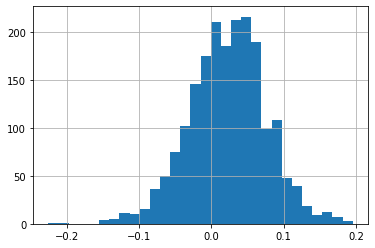

In [23]:
df_data.polarity.hist(bins=30)

In [25]:
np.sum(df_data.polarity >0.1)

126

In [29]:
df_selected = df_data[df_data.polarity < -0.1]

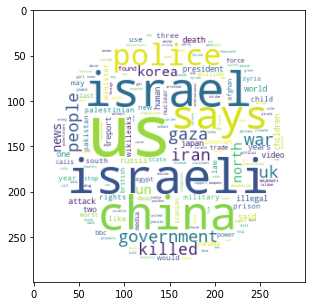

In [30]:
wordcloud_plot(df_selected['clean_data'], 'negative.png')

In [31]:
df_selected.head()

,Date,Label,summary,clean_data,polarity,subjectivity
20,2008-09-08,1,'A French judge has ordered two branches of Sc...,french judge ordered two branches scientologis...,-0.119313,0.335584
31,2008-09-23,0,'$US 13 billion of the money allocated for rec...,us billion money allocated reconstruction proj...,-0.116667,0.294444
58,2008-10-30,1,'Out-of-office reply ends up on bilingual road...,outofoffice reply ends bilingual road sign wal...,-0.122705,0.443357
109,2009-01-14,0,"""UN headquarters in Gaza hit by Israeli 'white...",un headquarters gaza hit israeli white phospho...,-0.132500,0.411667
111,2009-01-16,1,'Israeli farmers beginning to feel the sting o...,israeli farmers beginning feel sting worldwide...,-0.138294,0.279136


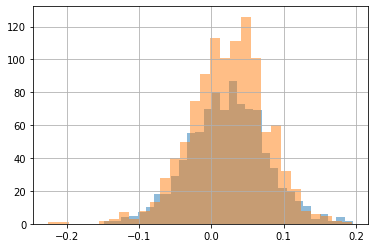

In [50]:
df_data[df_data.Label == 0]['polarity'].hist(bins=30, alpha=0.5, label='0', )
df_data[df_data.Label == 1]['polarity'].hist(bins=30, alpha=0.5, label='1', )
plt.legend()

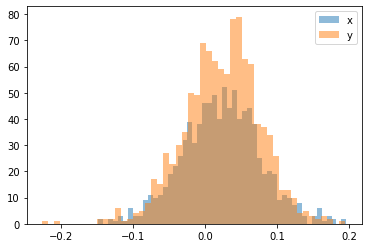

In [46]:
x = df_data[df_data.Label == 0]['polarity']
y = df_data[df_data.Label == 1]['polarity']
plt.hist(x, bins=50, alpha=0.5, label='x')
plt.hist(y, bins=50, alpha=0.5, label='y')
plt.legend()
plt.show()